In [9]:
# Review Exercises
import numpy as np
# • Represent a two-state payoff vector X = (Xu, Xd) and compute E[X]
# Assuming example values for Xu, Xd, and p
Xu = 120 # Up state payoff
Xd = 80 # Down state payoff
X = np.array([Xu, Xd]) # Two-state payoff vector
p = 0.6 # Probability of up state

# Compute expected value E[X]
expected_X = p * Xu + (1 - p) * Xd
print(f"Payoff vector X: {X}")
print(f"Expected value E[X]: {expected_X}")


# • For a stock payoff vector S1 and strike K, compute European call payoff C1
# Assuming example S1 (two states) and K
S1 = np.array([150, 90]) # Stock payoffs in up and down states
K = 100 # Strike price

# Compute call payoff componentwise using np.maximum
C1 = np.maximum(S1 - K, 0)
print(f"Stock payoff S1: {S1}")
print(f"Call payoff C1: {C1}")

# • Build a two-asset portfolio payoff V1 = ϕB B1 + ϕS S1
# Interpret: Each component of V1 represents the cash flow in that state (up or down)
# Assuming bond B1 (risk-free, e.g., pays 1 in both states), stock S1 as above
B1 = np.array([1, 1]) # Bond payoff (face value 1 in both states)
phi_B = 50 # Units of bond
phi_S = 0.5 # Units of stock

# Compute portfolio payoff
V1 = phi_B * B1 + phi_S * S1
print(f"Bond payoff B1: {B1}")
print(f"Portfolio payoff V1: {V1}")


Payoff vector X: [120  80]
Expected value E[X]: 104.0
Stock payoff S1: [150  90]
Call payoff C1: [50  0]
Bond payoff B1: [1 1]
Portfolio payoff V1: [125.  95.]


In [10]:
# Exercises
# • Compute payoff of a portfolio that costs exactly 1 at t=0
# Assuming example payoffs and prices for bond B and stock S
B1 = np.array([1, 1]) # Bond payoff
S1 = np.array([120, 80]) # Stock payoff
B0 = 0.95 # Bond price at t=0 (e.g., discount)
S0 = 100 # Stock price at t=0

# To cost exactly 1 at t=0, solve for weights phi_B and phi_S such that phi_B * B0 + phi_S * S0 = 1
phi_S = 1 / (S0 + B0) # Arbitrary split; here equal weight in value terms for simplicity
phi_B = 1 / (S0 + B0)

# Example: All in bond: phi_B = 1 / B0, phi_S = 0
phi_B = 1 / B0
phi_S = 0
portfolio_payoff = phi_B * B1 + phi_S * S1
print(f"Portfolio payoff for unit cost (all in bond): {portfolio_payoff}")

# Alternative: solve for specific allocation
# Half value in each: value_B = 0.5, phi_B = 0.5 / B0, phi_S = 0.5 / S0
phi_B = 0.5 / B0
phi_S = 0.5 / S0
portfolio_payoff = phi_B * B1 + phi_S * S1
print(f"Portfolio payoff for unit cost (half each by value): {portfolio_payoff}")

# • Choose payoff target C1 and solve M phi = C1 where M = [B1 S1] (as columns)
M = np.column_stack((B1, S1)) # Payoff matrix
C1 = np.array([100, 50]) # Target payoff in up and down states

# Solve for phi = [phi_B, phi_S]
phi = np.linalg.solve(M, C1)
print(f"Replication portfolio phi: {phi}")

# Verify M phi - C1 == 0 (within numerical tolerance)
replicated = np.dot(M, phi)
print(f"Replicated payoff: {replicated}")
print(f"Verification (close to zero): {np.allclose(replicated, C1)}")

# • Explore sensitivity - perturb one payoff component and observe phi changes
C1_perturbed = np.array([105, 50]) # Perturb up state by +5

# Solve again
phi_perturbed = np.linalg.solve(M, C1_perturbed)
print(f"Original phi: {phi}")
print(f"Perturbed phi: {phi_perturbed}")

Portfolio payoff for unit cost (all in bond): [1.05263158 1.05263158]
Portfolio payoff for unit cost (half each by value): [1.12631579 0.92631579]
Replication portfolio phi: [-50.     1.25]
Replicated payoff: [100.  50.]
Verification (close to zero): True
Original phi: [-50.     1.25]
Perturbed phi: [-60.      1.375]


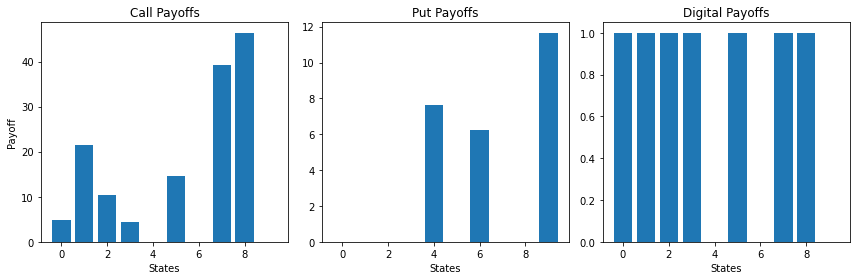

    Option  Expected Value  Standard Deviation
0     Call       14.129793           15.854568
1      Put        2.553165            4.097704
2  Digital        0.700000            0.458258

Fun Twist Results:
Estimated curvatures: Call=0.0083, Put=0.0083, Digital=-0.0009
The Call option shows the most curvature in realized payoffs.


In [11]:
# Capstone Task
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to compute option payoffs
def option_payoffs(S1, K):
    call = np.maximum(S1 - K, 0)
    put = np.maximum(K - S1, 0)
    digital = np.where(S1 >= K, 1, 0) # Digital call paying 1 if S1 >= K
    return call, put, digital

# Function to visualize payoffs as bar charts
def visualize_payoffs(S1, call, put, digital):
    states = np.arange(len(S1))
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    axs[0].bar(states, call)
    axs[0].set_title('Call Payoffs')
    axs[0].set_xlabel('States')
    axs[0].set_ylabel('Payoff')
    
    axs[1].bar(states, put)
    axs[1].set_title('Put Payoffs')
    axs[1].set_xlabel('States')
    
    axs[2].bar(states, digital)
    axs[2].set_title('Digital Payoffs')
    axs[2].set_xlabel('States')
    
    plt.tight_layout()
    plt.show()

# Function to create stats table (assuming uniform probabilities)
def stats_table(call, put, digital):
    payoffs = [call, put, digital]
    names = ['Call', 'Put', 'Digital']
    
    data = {
        'Option': names,
        'Expected Value': [np.mean(pay) for pay in payoffs],
        'Standard Deviation': [np.std(pay) for pay in payoffs]
    }
    
    df = pd.DataFrame(data)
    return df

# Fun twist: Randomly generate S1, compute options, and compare curvature via quadratic fit
np.random.seed(0) # Fixed seed for reproducibility
num_states = 10 # Arbitrary number of states for illustration
random_S1 = np.random.uniform(50, 150, num_states) # Random payoffs around strike
K = 100 # Strike price

call, put, digital = option_payoffs(random_S1, K)

visualize_payoffs(random_S1, call, put, digital)

# Stats table
print(stats_table(call, put, digital))

# Twist: Sort S1 and fit quadratic to estimate curvature (a in a*x^2 + b*x + c)
def estimate_curvature(S1, payoff):
    indices = np.argsort(S1)
    S_sorted = S1[indices]
    pay_sorted = payoff[indices]
    coeff = np.polyfit(S_sorted, pay_sorted, 2) # Quadratic fit
    return coeff[0] # Leading coefficient approximates curvature/2

curv_call = estimate_curvature(random_S1, call)
curv_put = estimate_curvature(random_S1, put)
curv_digital = estimate_curvature(random_S1, digital)

curvatures = {'Call': curv_call, 'Put': curv_put, 'Digital': curv_digital}
most_curved = max(curvatures, key=curvatures.get)

print(f"\nFun Twist Results:")
print(f"Estimated curvatures: Call={curv_call:.4f}, Put={curv_put:.4f}, Digital={curv_digital:.4f}")
print(f"The {most_curved} option shows the most curvature in realized payoffs.")